In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

# Load in test data files

In [ ]:
import os
datasets_old=[]
datasets_new=[]
count=0
for file in os.listdir('drive/MyDrive/Data Processing /ERP_pickle_files/new_realtime_raw/old_processing'):
  data=pickle.load(open('drive/MyDrive/Data Processing /ERP_pickle_files/new_realtime_raw/old_processing/'+file,'rb'))
  print('old', file)
  datasets_old.append(data)
  data=pickle.load(open('drive/MyDrive/Data Processing /ERP_pickle_files/new_realtime_raw/new_processing/'+file,'rb'))
  print('new',file)
  datasets_new.append(data)
  count+=1
  if count == 5:
    break

old realtime_raw1.pickle
new realtime_raw1.pickle
old realtime_raw2.pickle
new realtime_raw2.pickle
old realtime_raw3.pickle
new realtime_raw3.pickle
old realtime_raw4.pickle
new realtime_raw4.pickle
old realtime_raw5.pickle
new realtime_raw5.pickle


In [ ]:
import numpy as np


print(np.array(datasets_new[0]).shape)

(9432, 401, 3)


# Loading in two models for testing:
First model takes in only dataset_old
Second model uses both dataset_old AND dataset_new

In [ ]:
import keras
model=keras.saving.load_model('drive/MyDrive/Data Processing /model.keras', custom_objects=None, compile=True, safe_mode=True)
model_feet =keras.saving.load_model('drive/MyDrive/Data Processing /model_with_delta.keras', custom_objects=None, compile=True, safe_mode=True)

# Combining two datasets to feed into second model

In [ ]:
import numpy as np

data_comb = []
for i in range(len(datasets_old)):
  comb= np.append(datasets_old[i], datasets_new[i], axis=2)
  data_comb.append(comb)


In [ ]:
data_comb[0].shape

(9432, 401, 6)

# Running test datasets againts both models

In [ ]:
x=[]
y1=[]
y2=[]
for i in range(len(datasets_old)):
  res1=model.predict(datasets_old[i])
  res2=model_new.predict(data_comb[i])
  time= np.linspace(0,len(res1), len(res1))
  x.append(time)
  y1.append(res1)
  y2.append(res2)

# Visualizing results

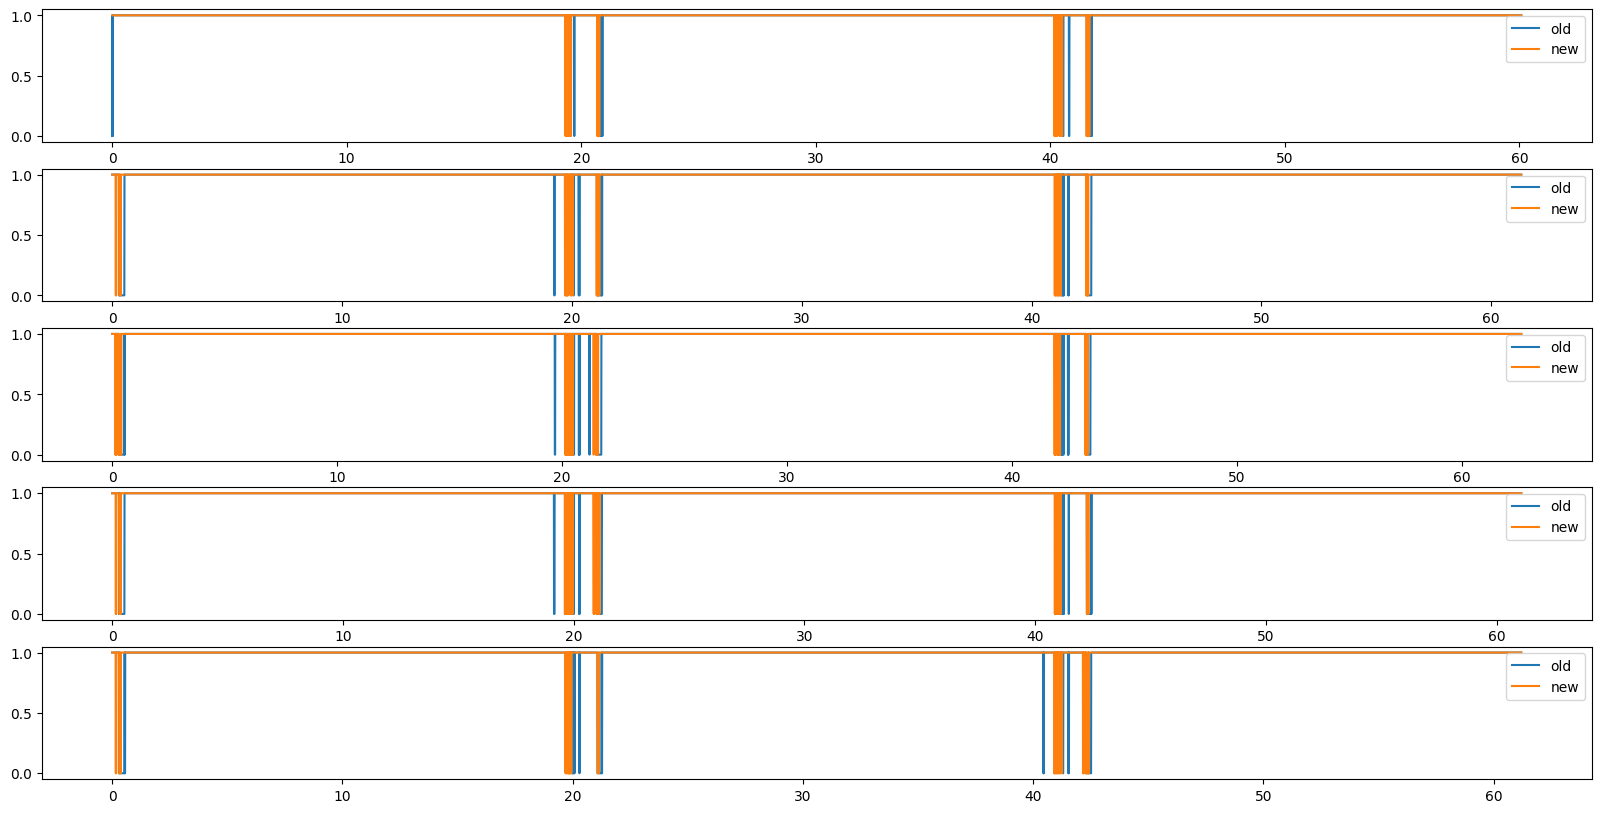

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(5, figsize=(20,10) )
for i in range(5):
  ax[i].plot(x[i]/157, y1[i])
  ax[i].plot(x[i]/157, y2[i])
  ax[i].legend(labels=['old', 'new'])
plt.show()



# Testing how aligned both models are with each other

In [ ]:

for j in range(5):
  count=0
  for i in range(len(y1[j])):
    if y1[j][i]==y2[j][i]:
      count+=1
  print(count/len(y1[j]))

0.9919423240033927
0.9848311688311688
0.9845434207850315
0.9849796599561906
0.985428809325562


# Seeing how many events each model predicts per run

In [ ]:

for j in range(5):
  events0=0
  for i in range(1,len(y1[j])):
    if y1[j][i]!=y1[j][i-1]:
      events0+=1
  events1=0
  for i in range(1,len(y2[j])):
    if y2[j][i]!=y2[j][i-1]:
      events1+=1
  print(events0, events1)

19 56
34 74
36 86
32 88
34 84
